Normal Distribtuion Description is here:
  https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [10]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Calculate a few first moments:
mean, var, skew, kurt = norm.stats(moments='mvsk')
print(mean)
print(var)
print(skew)
print(kurt)

0.0
1.0
0.0
0.0


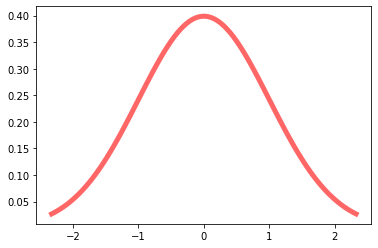

In [14]:
# Display the probability density function (pdf):
fig, ax = plt.subplots(1, 1)
# np.linspace returns evenly spaced numbers over a specified interval.
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html
# ppf refers to a percent point function (inverse of the cdf) at q of the given RV.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.ppf.html
#in this case we want to start sampling at the point 0.01 and end at 0.99
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
        'r-', lw=5, alpha=0.6, label='norm pdf')

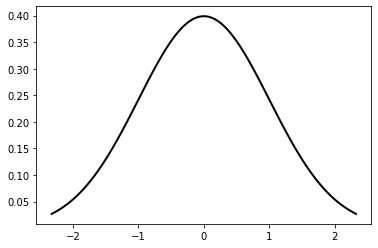

In [16]:
#Alternatively, the distribution object can be called (as a function) to fix the shape, location and scale parameters. This returns a “frozen” RV object holding the given parameters fixed.

#Freeze the distribution and display the frozen pdf:
fig, ax = plt.subplots(1, 1)
rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [17]:
#Check accuracy of cdf and ppf:

vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))

True

In [24]:
# generate random numbers from the norm distribtuion
r = norm.rvs(size=1000)

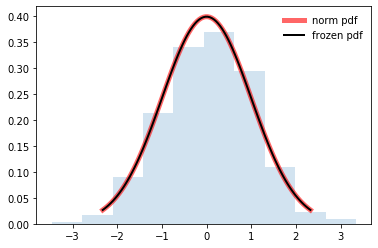

In [28]:
# compare histogram of the numbers generated to the norm.pdf, norm.frozen and histogram of the generated numbers
fig, ax = plt.subplots(1, 1)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.plot(x, norm.pdf(x),'r-', lw=5, alpha=0.6, label='norm pdf')
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
ax.legend(loc='best', frameon=False)
plt.show()